In [1]:
import numpy as np
import librosa 
from dtw import dtw
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.utils import to_categorical
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [37]:
# untuk mendapatkan rata-rata di setiap (13 ciri)  
def get_average_mfccs():
    array = []
    for i in range(0,13):
        array.append(np.average(mfccs[0][i]))
    
    return(array)

[4]


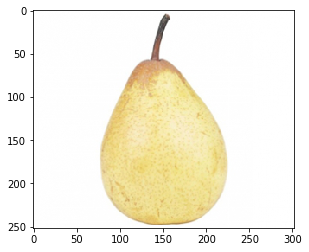

In [60]:
# Show Random Image 
perpus = ['apel.jpg','jambu.jpg','jeruk.jpg','pir.jpg','semangka.jpg']
index = random.choice([1, 2, 3,4,5]);
img=mpimg.imread('img/'+perpus[index-1])
kelas = [index]
print(kelas)
imgplot = plt.imshow(img)
plt.show() 

In [88]:
#create mfcc data yang akan diuji
mfccs = {}
# perpus = ['apel.jpg','jambu.jpg','jeruk.jpg','pir.jpg','semangka.jpg']
# index = random.choice([1, 2, 3,4,5]);
# y, sr = librosa.load('dataset/jambu/27.wav') #ganti source sesuai dengan data audionya
y, sr = librosa.load('dataset/uji_2.wav') #ganti source sesuai dengan data audionya
mfcc = librosa.feature.mfcc(y, sr, n_mfcc=13)
mfccs[0] = mfcc.T
    
data = []
a = get_average_mfccs()
data.append(a)

model = load_model('model.h5')
fitur = np.array(data)
kelas = [index]
probas = model.predict(fitur)
classes = probas.argmax(axis=-1)

print("[PREDICT] Actual Class =", kelas, ", Predict Class =",classes)

('[PREDICT] Actual Class =', [4], ', Predict Class =', array([3]))
